# Support Vector Machine — Drug Response Classification
This notebook solves all tasks as specified in **Support Vector mechine.docx**.

## Task 1 — Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/mnt/data/Pharma_Industry (1).csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Drug Dosage (mg),500.0,-0.037761,0.979891,-3.019512,-0.642003,-0.019340,0.641151,2.949094
Systolic Blood Pressure (mmHg),500.0,0.214957,1.247567,-3.773897,-0.565168,0.201532,0.951375,4.111751
Heart Rate (BPM),500.0,0.062871,0.971978,-2.940389,-0.648157,0.027732,0.710774,3.193108
Liver Toxicity Index (U/L),500.0,0.054398,0.986001,-3.401277,-0.586085,-0.065661,0.633914,3.373269
Blood Glucose Level (mg/dL),500.0,-0.171863,0.983765,-3.110431,-0.797715,-0.108106,0.513555,2.518023
Drug Response,500.0,0.520000,0.500100,0.000000,0.000000,1.000000,1.000000,1.000000


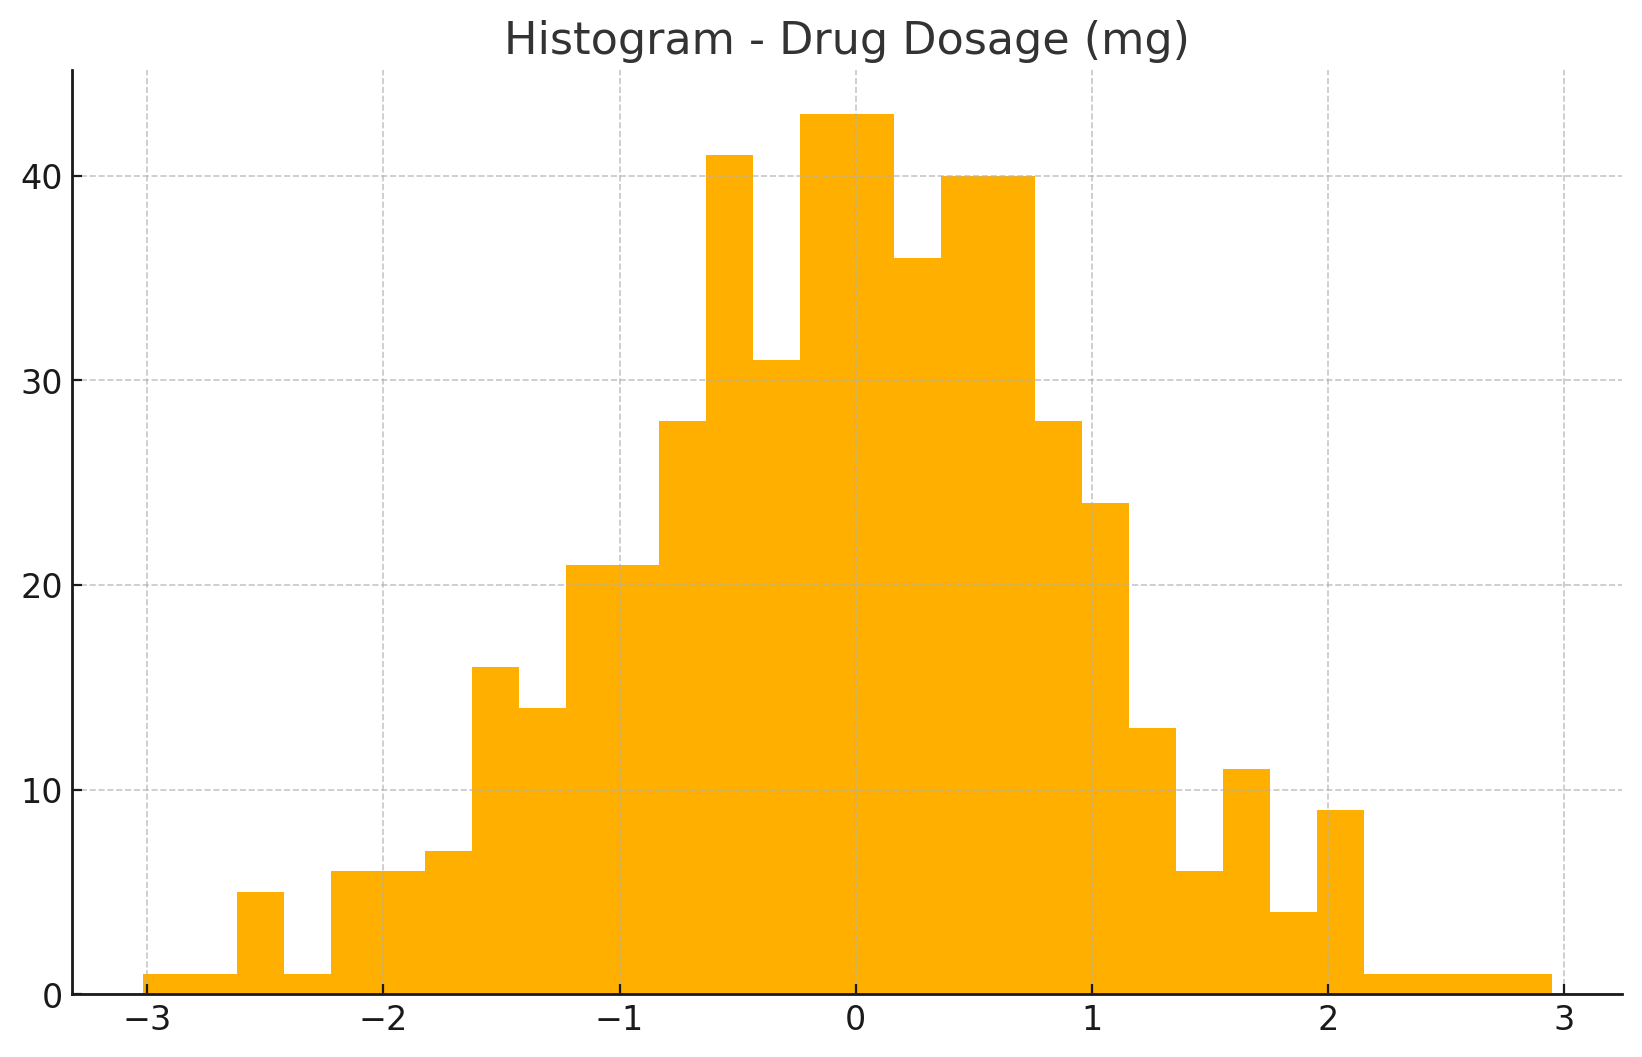

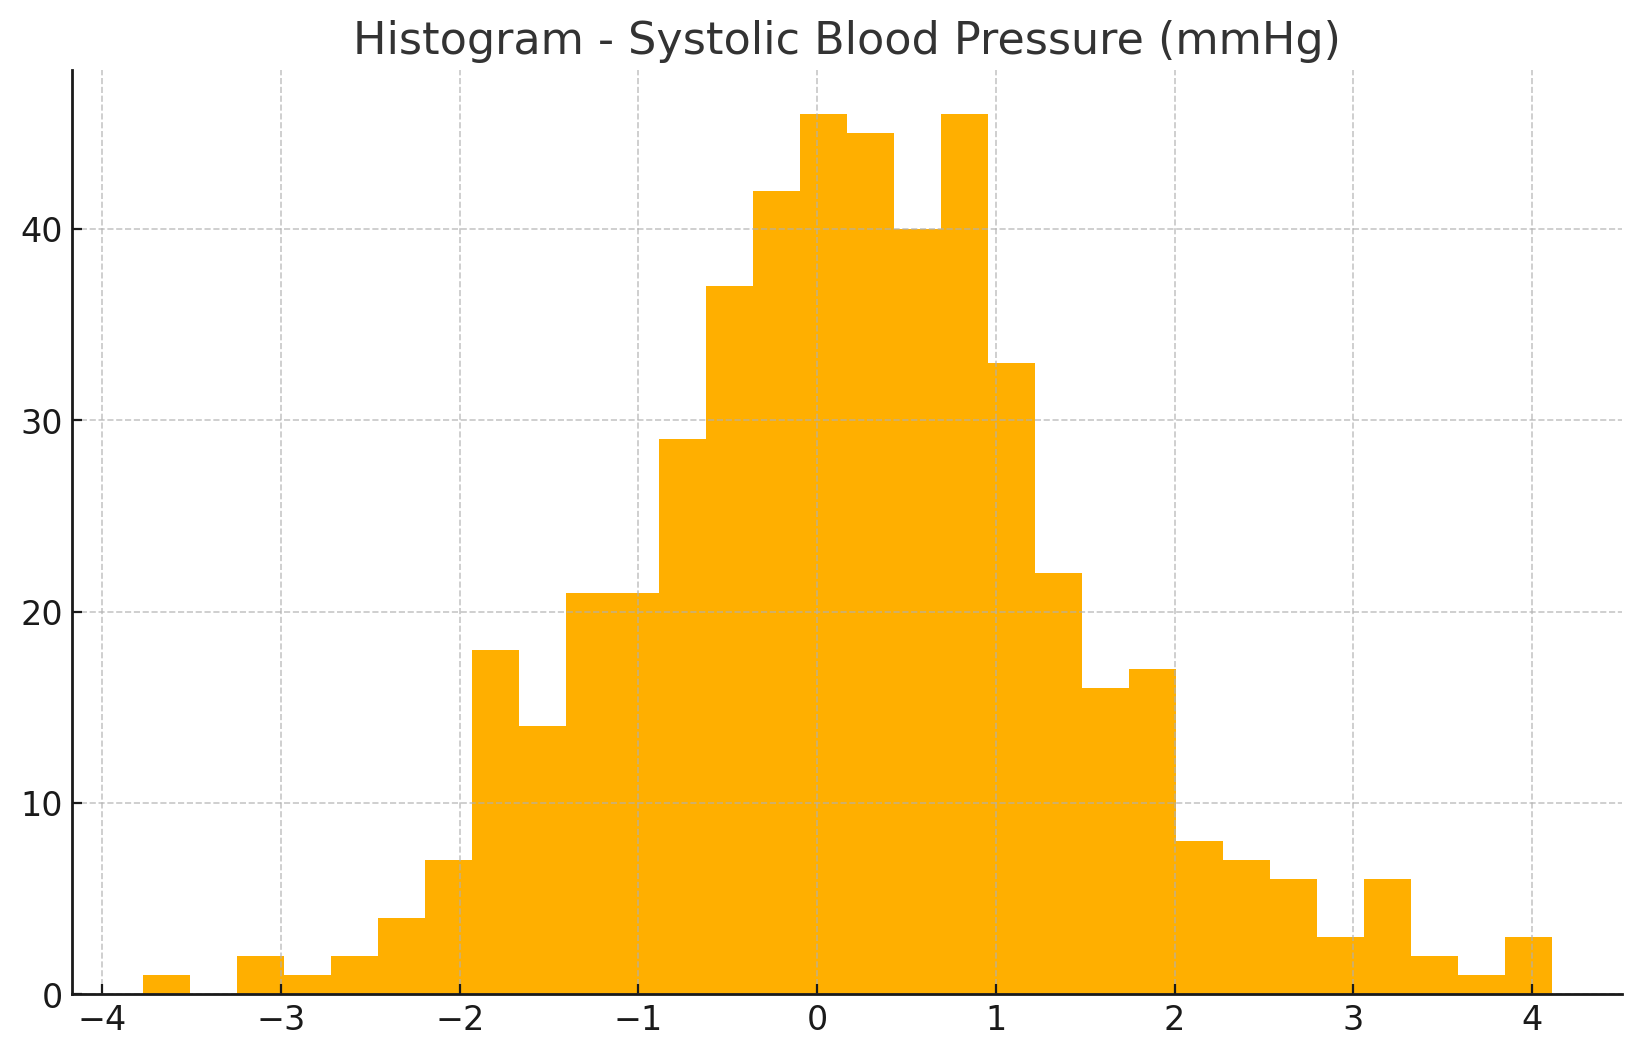

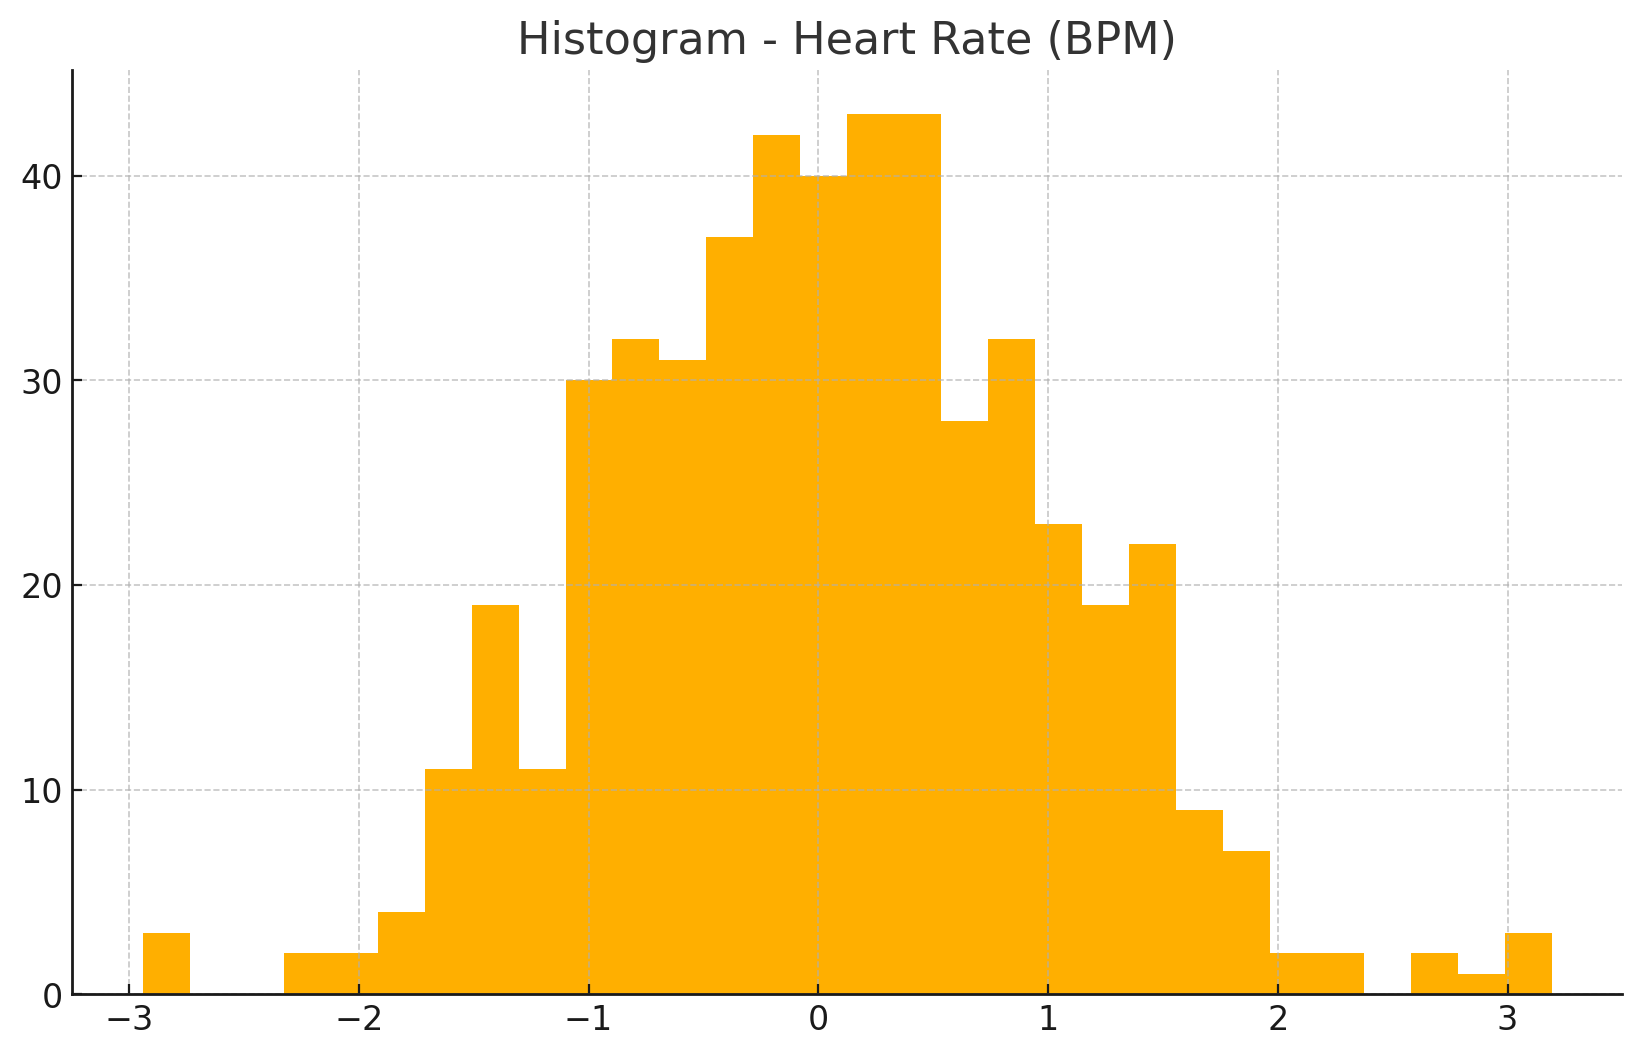

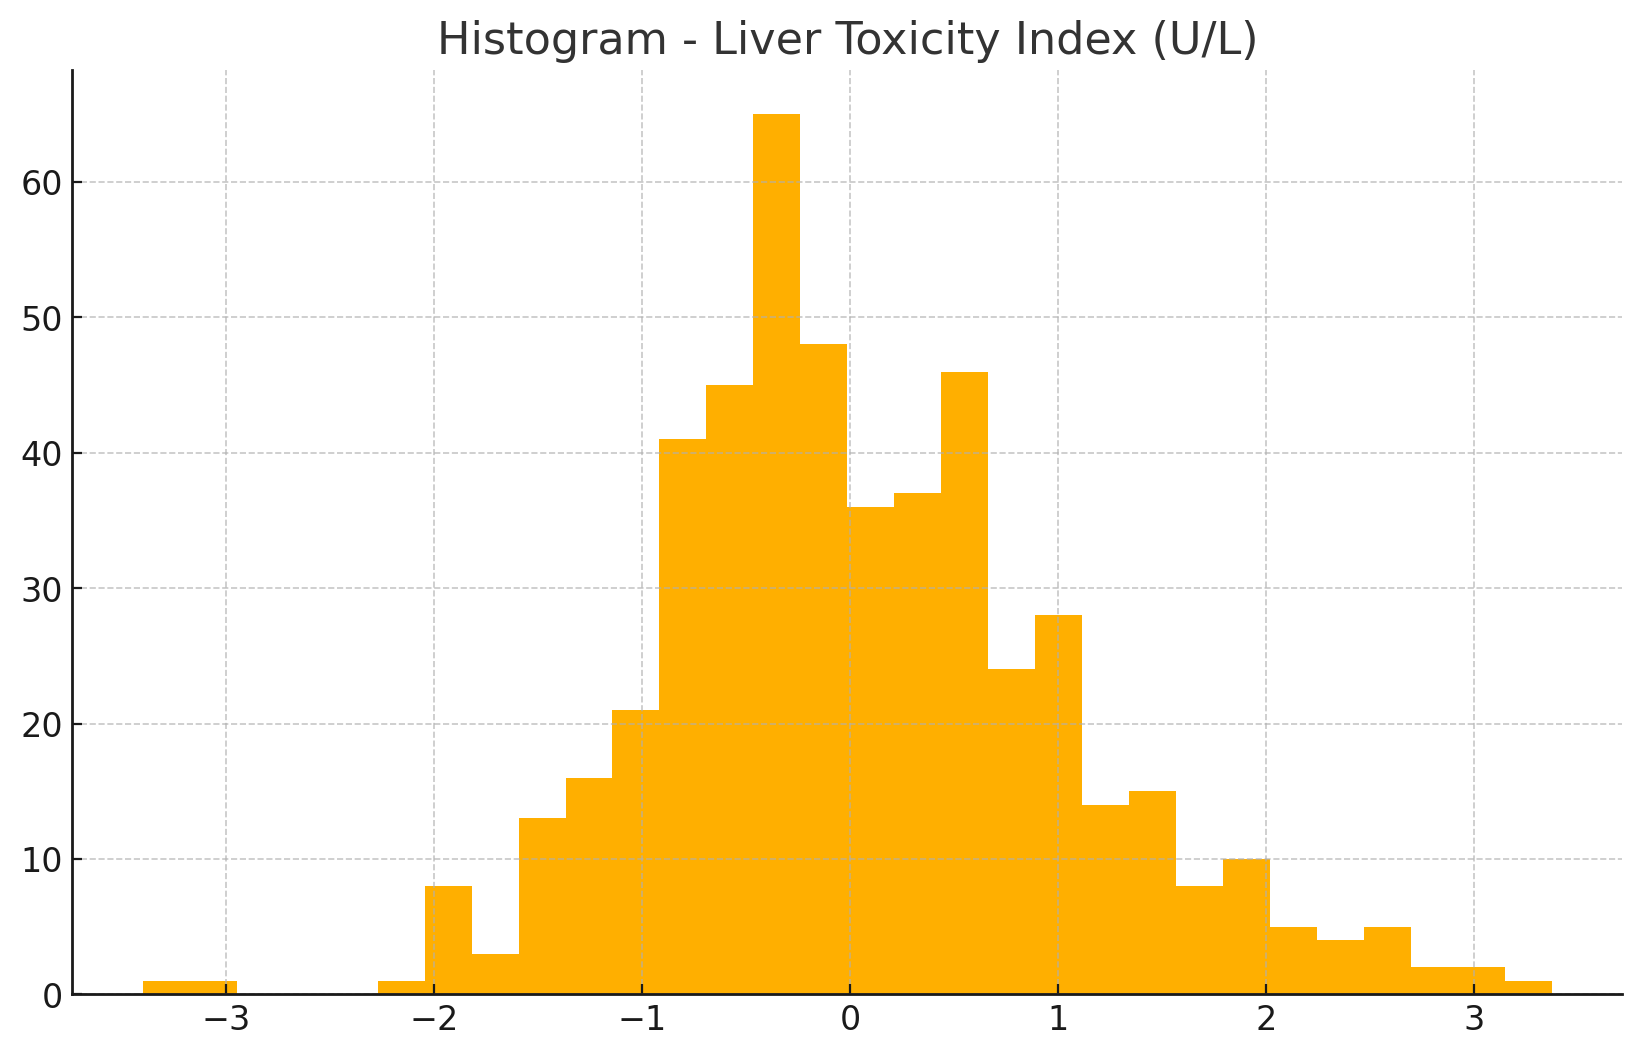

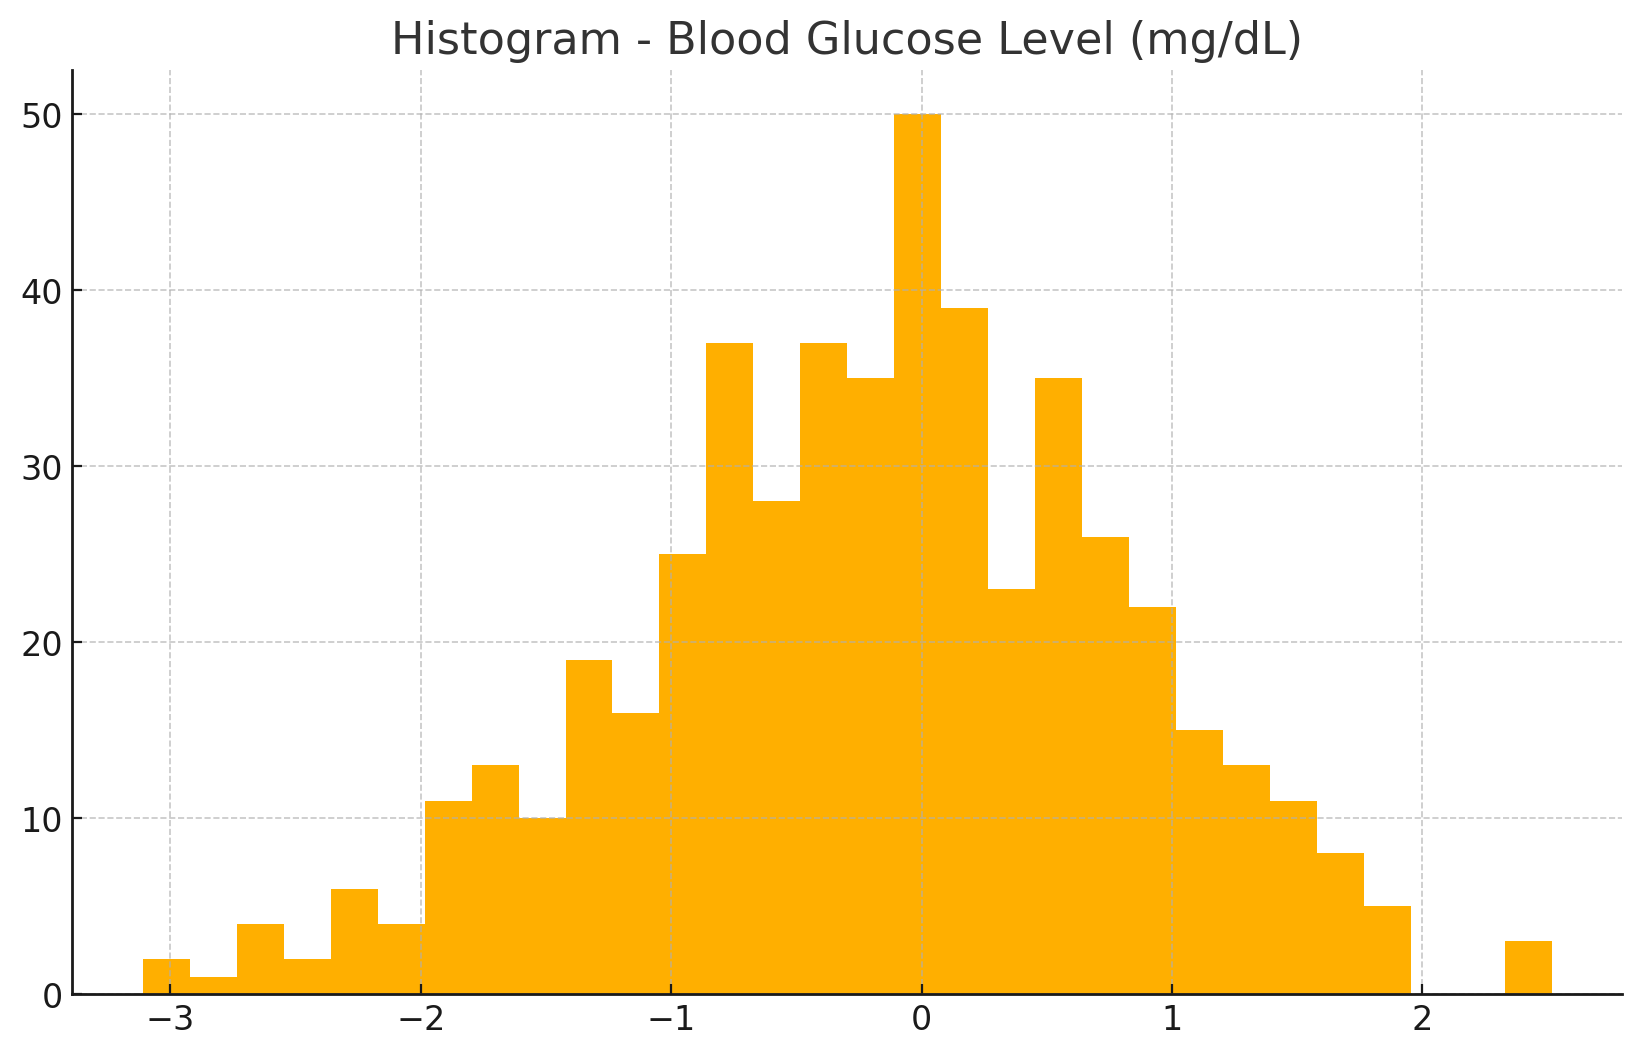

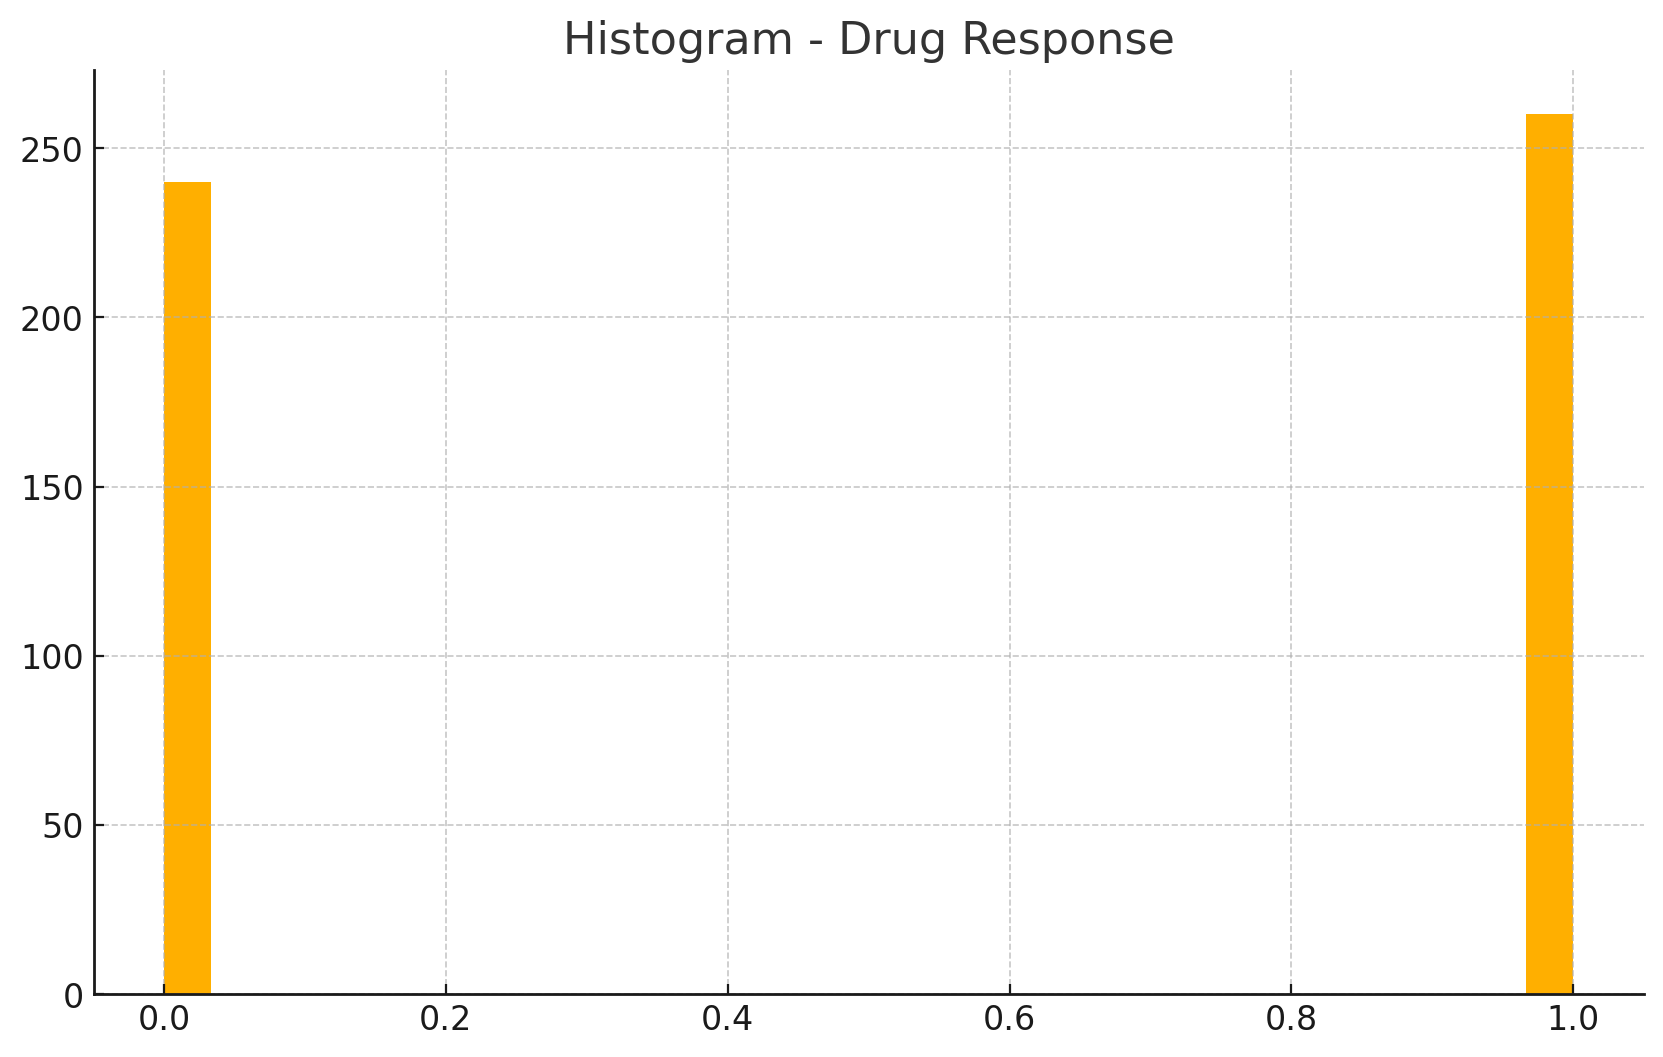

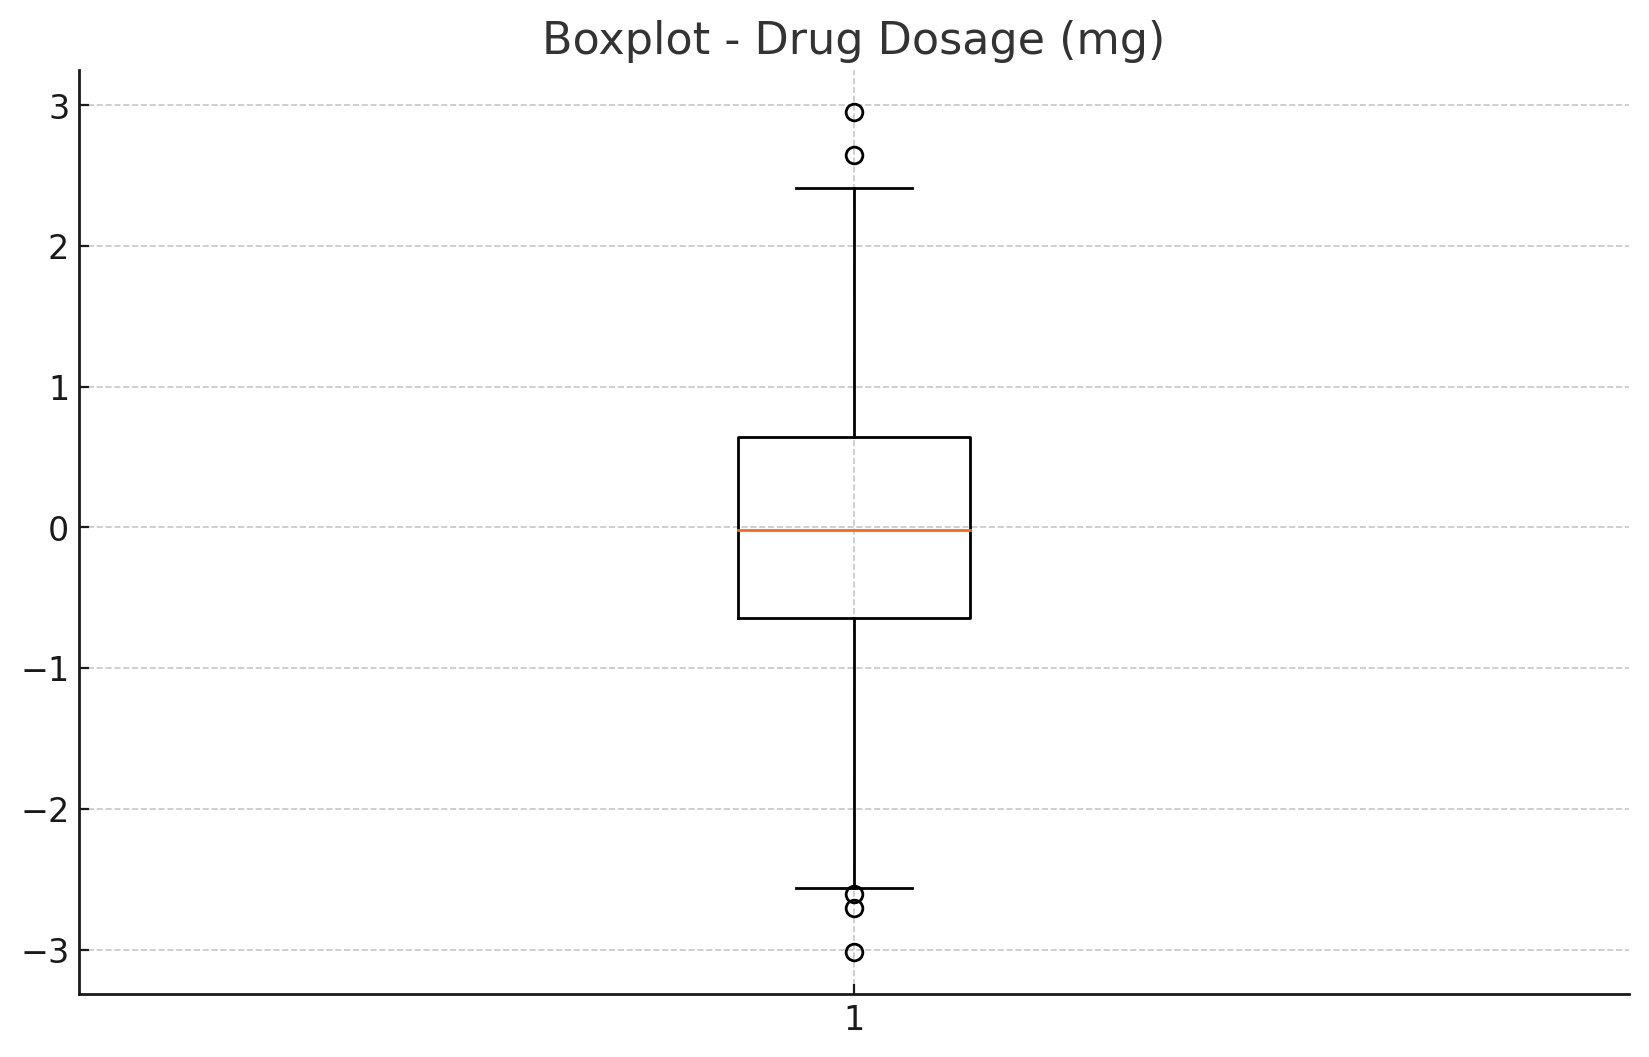

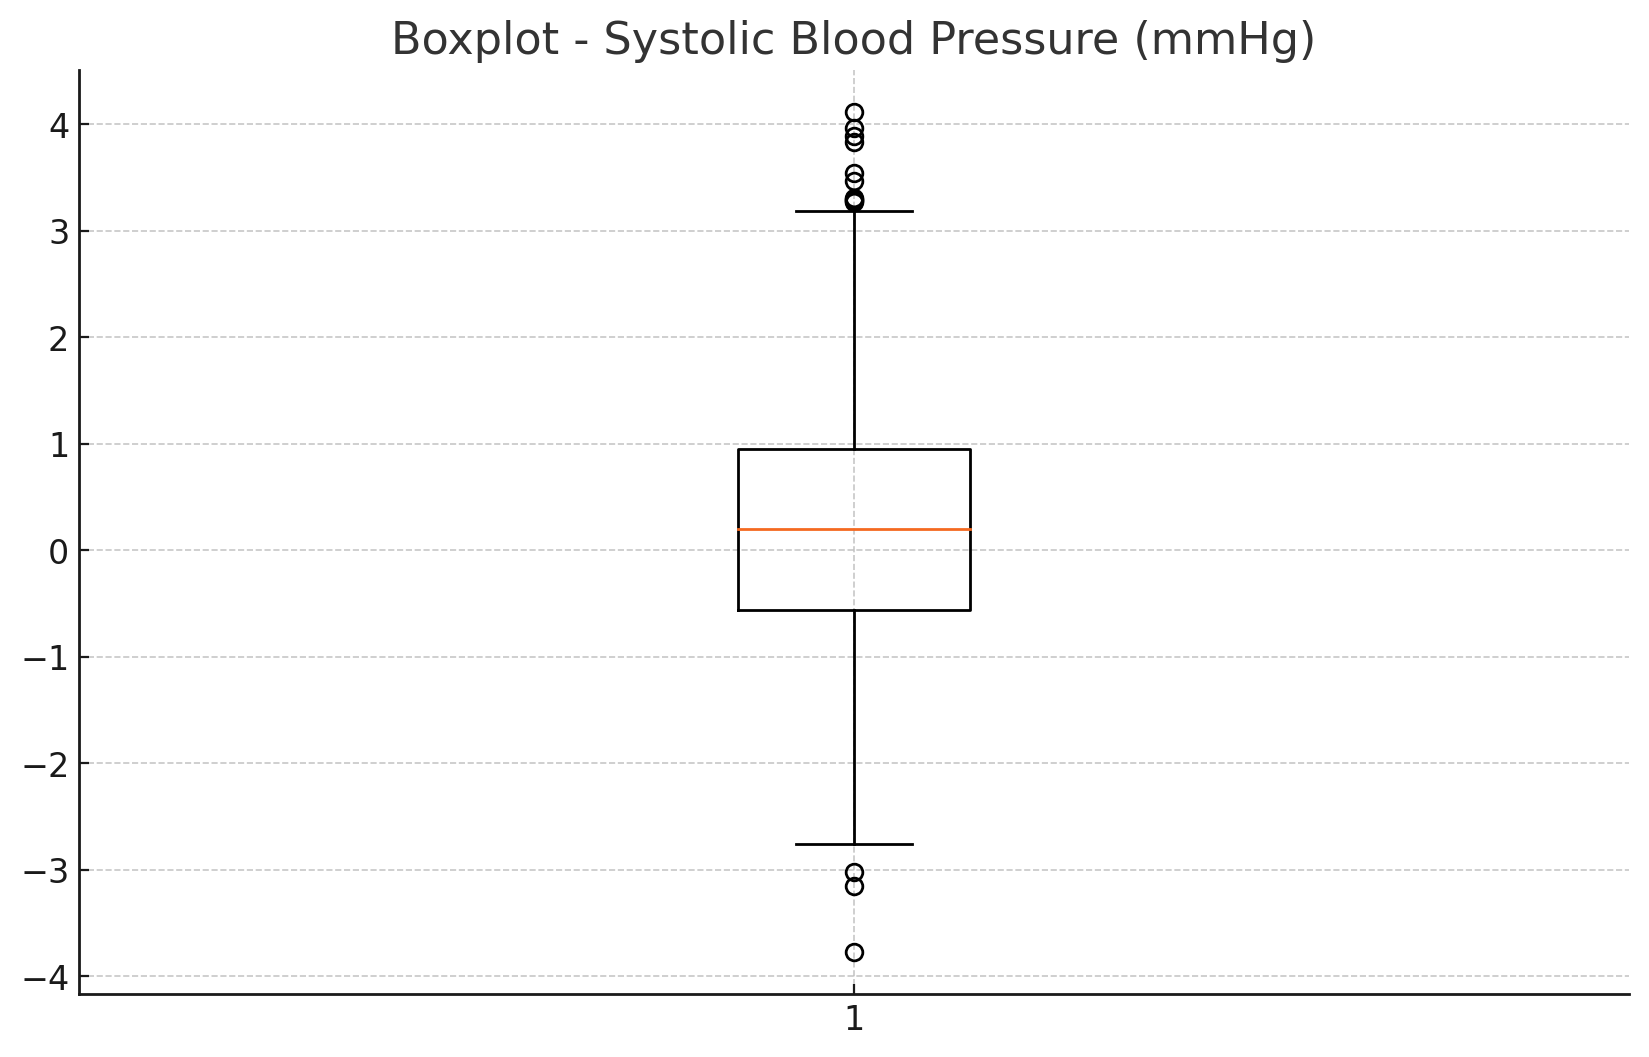

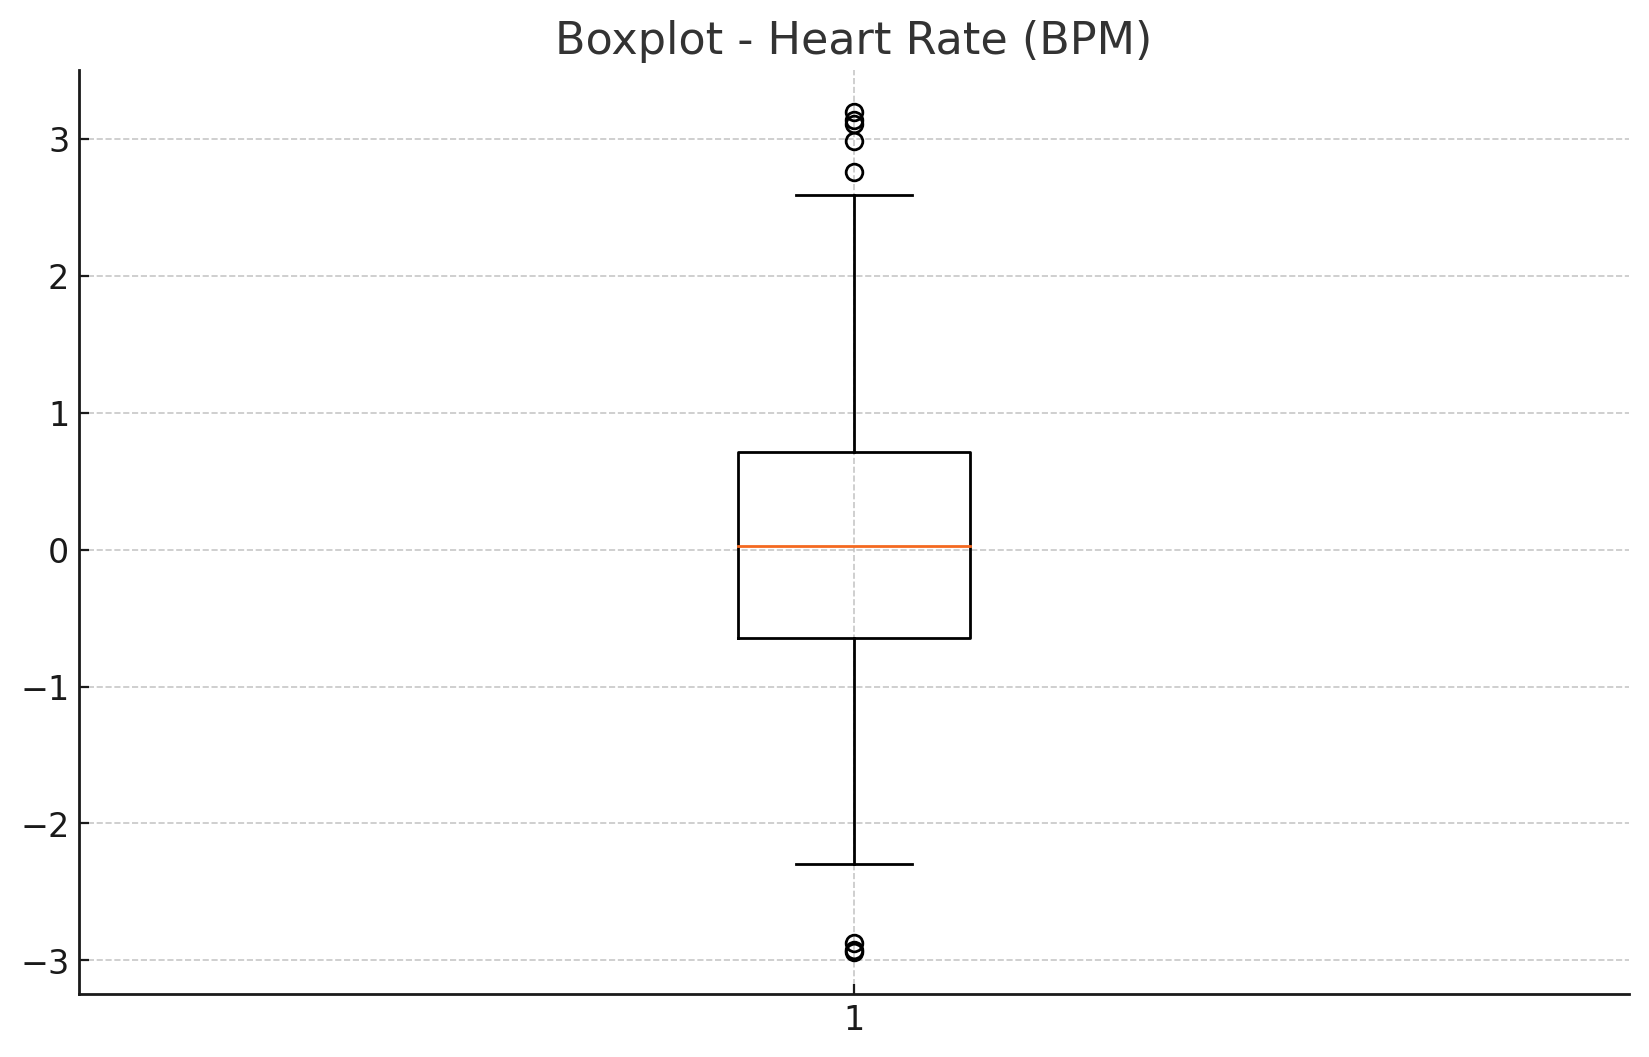

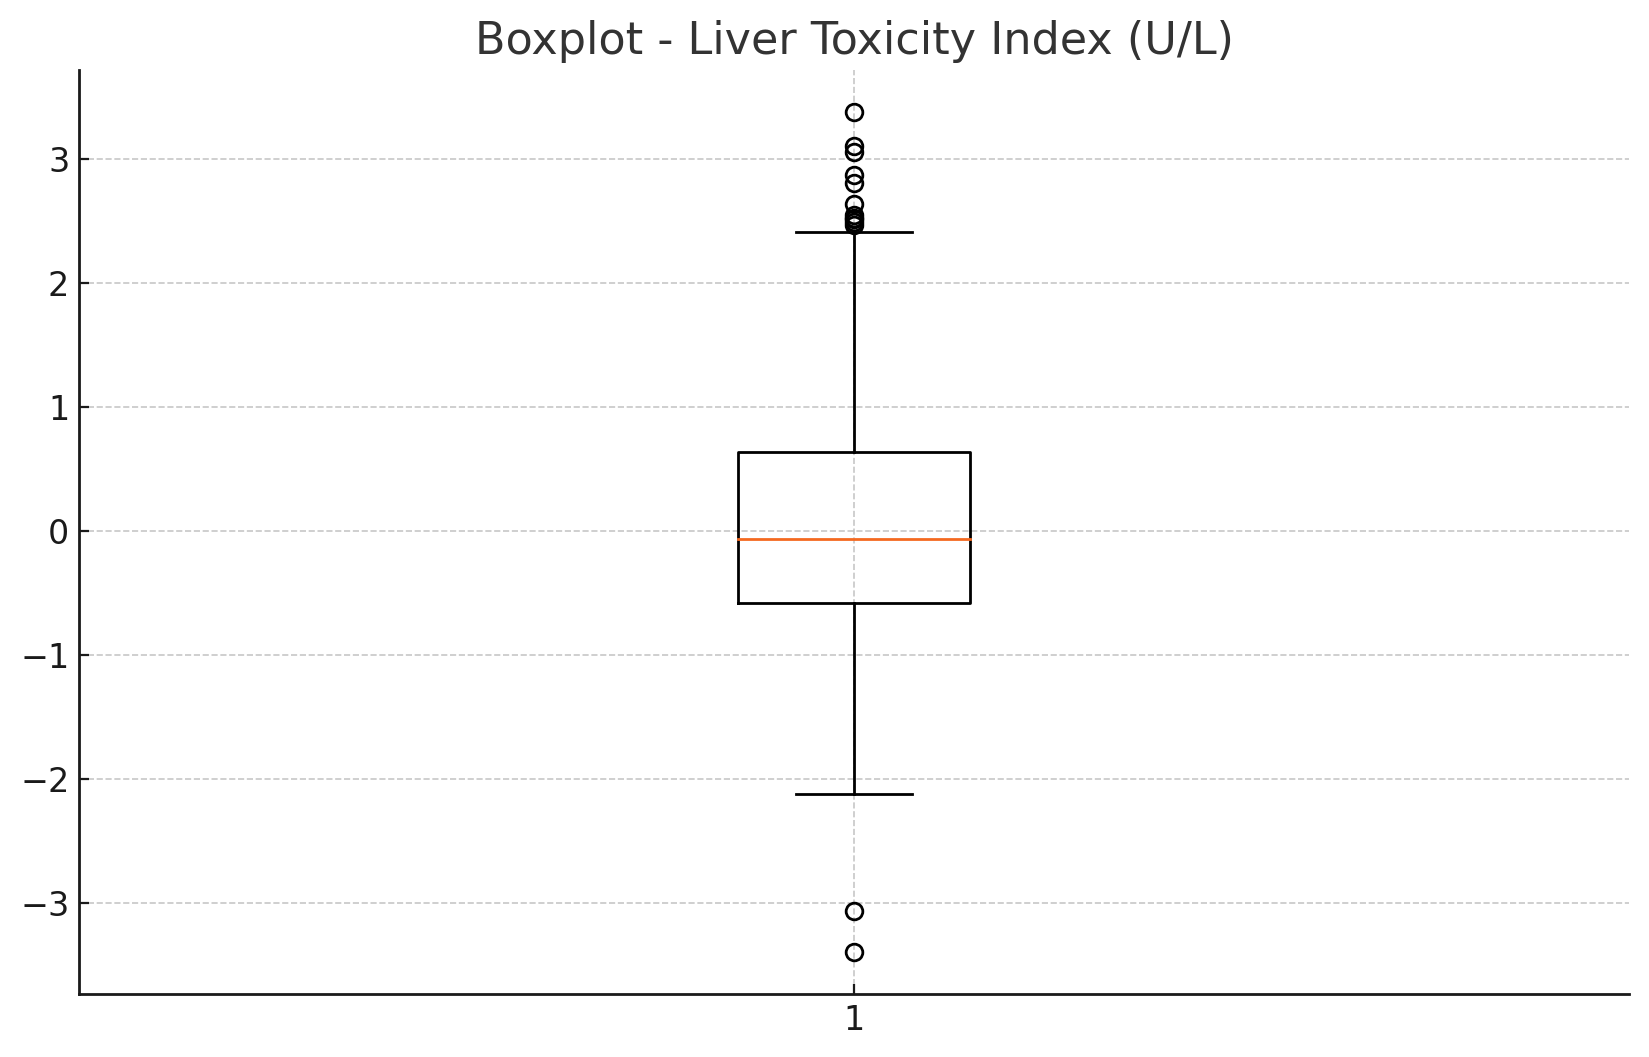

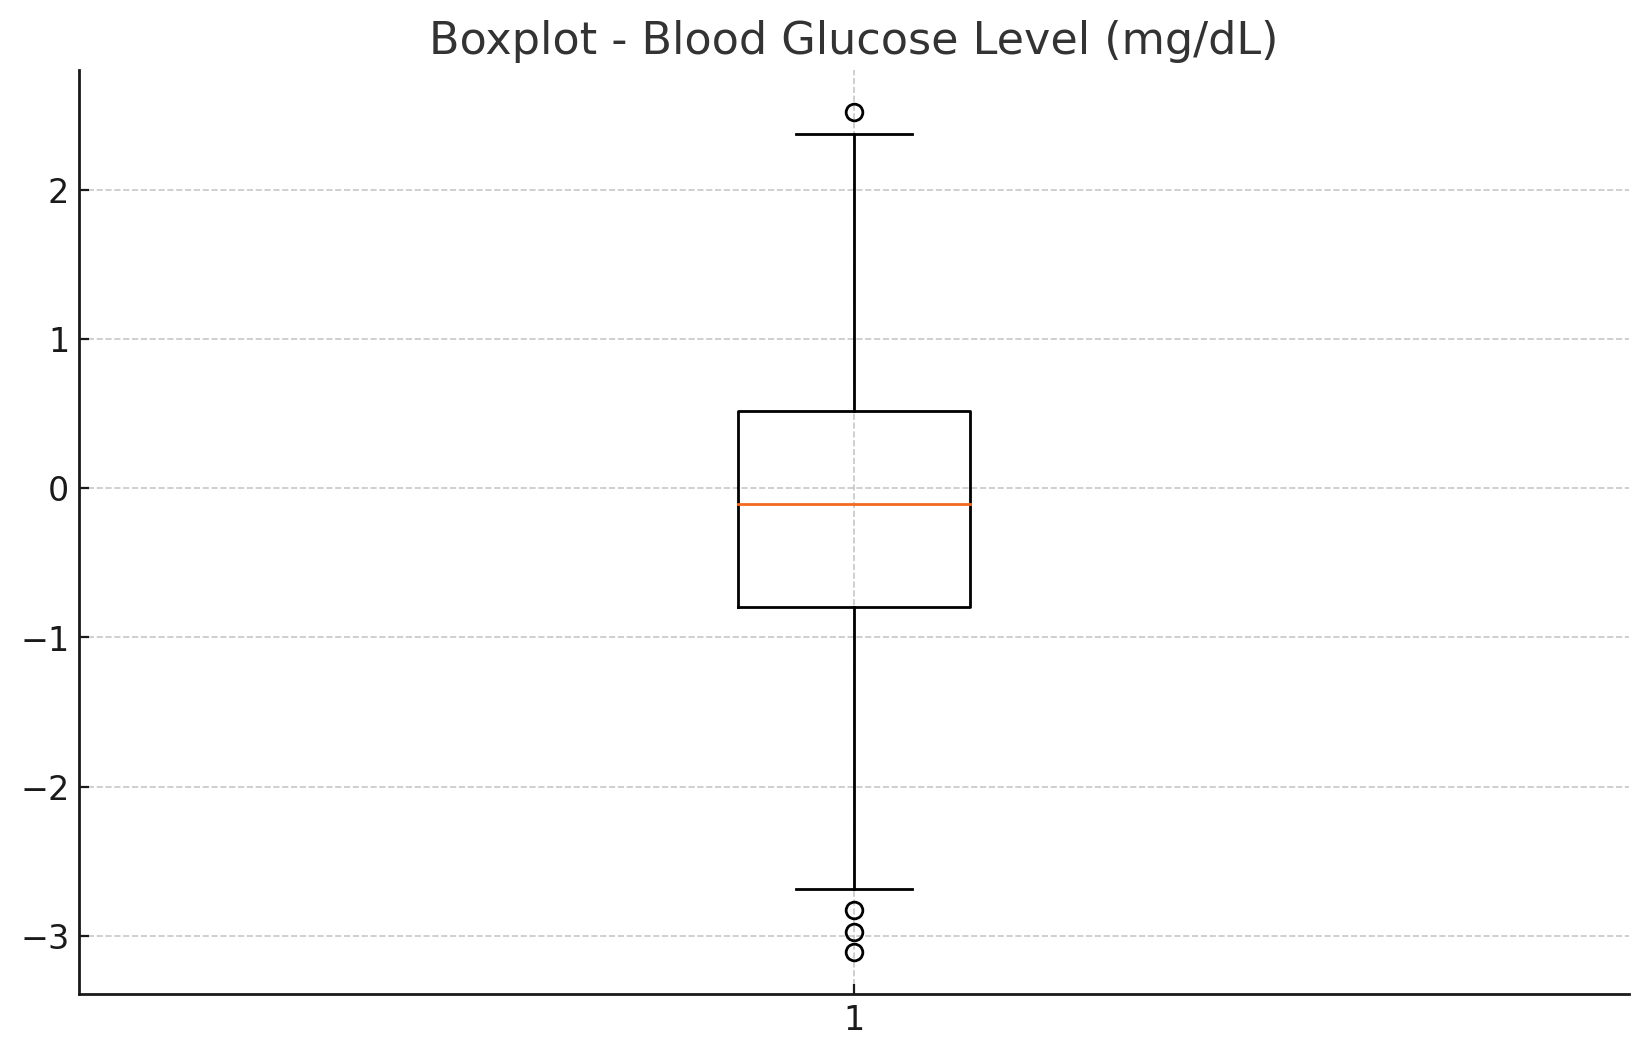

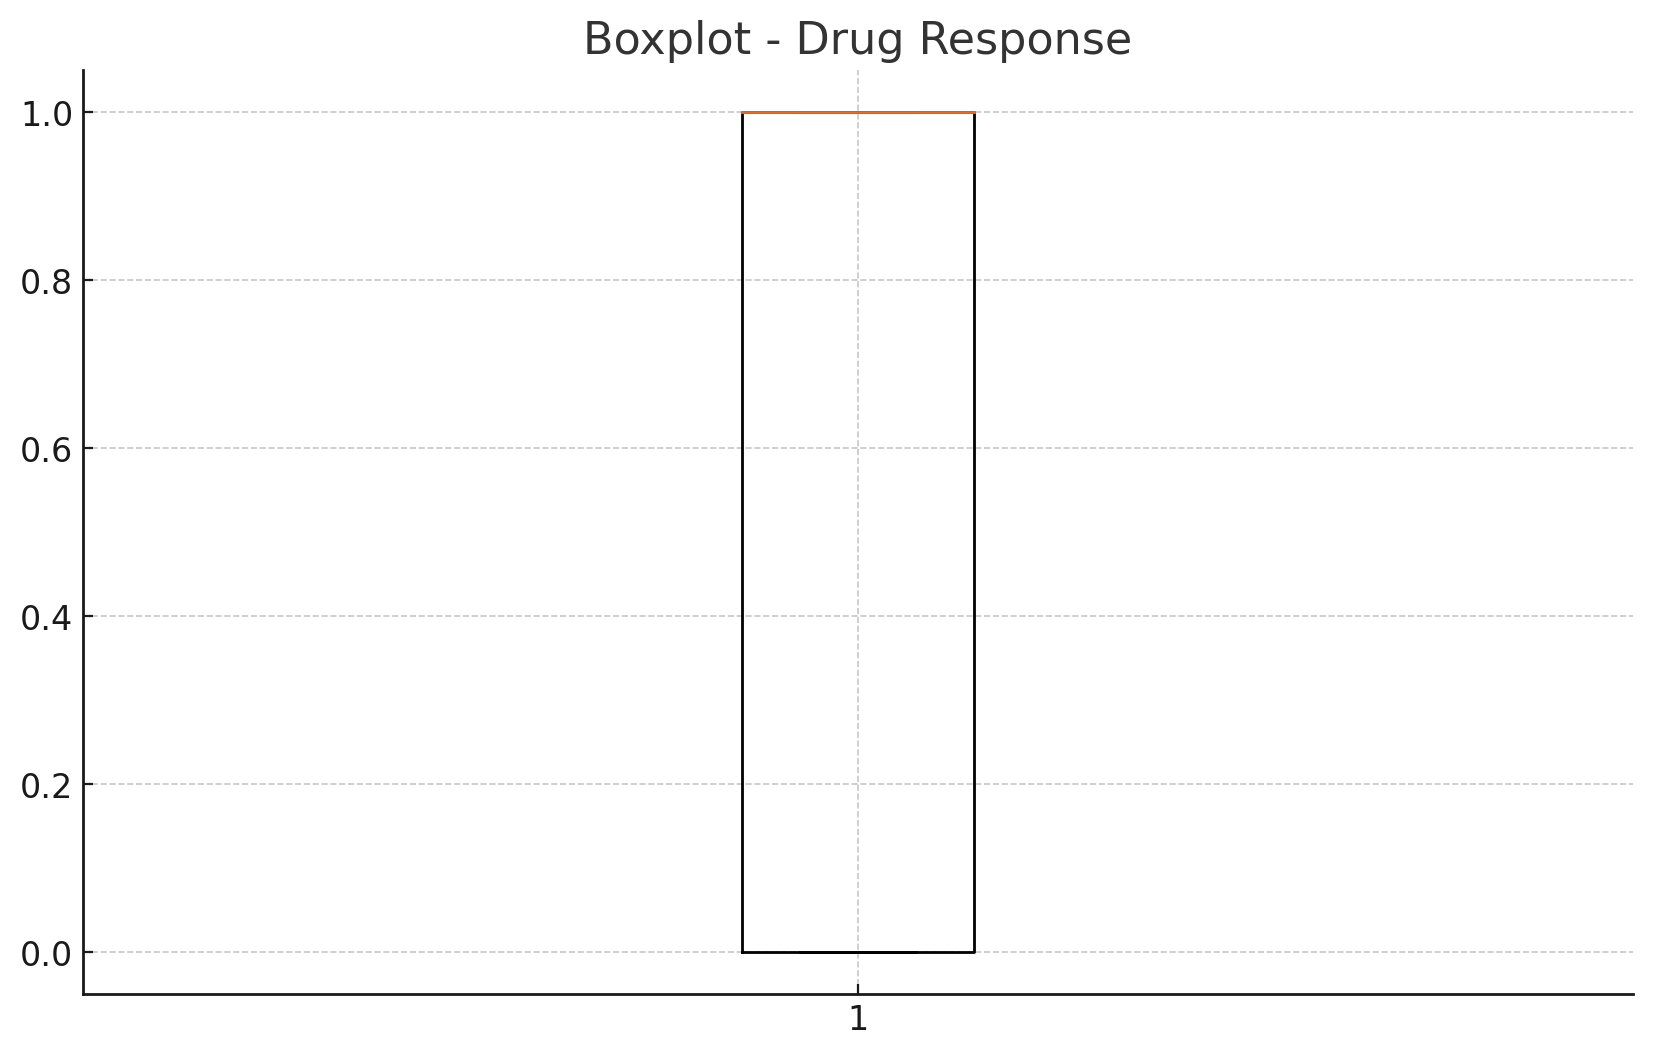

In [4]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()

for c in num_cols:
    plt.figure()
    plt.hist(df[c], bins=30)
    plt.title(f"Histogram - {c}")
    plt.show()

for c in num_cols:
    plt.figure()
    plt.boxplot(df[c])
    plt.title(f"Boxplot - {c}")
    plt.show()

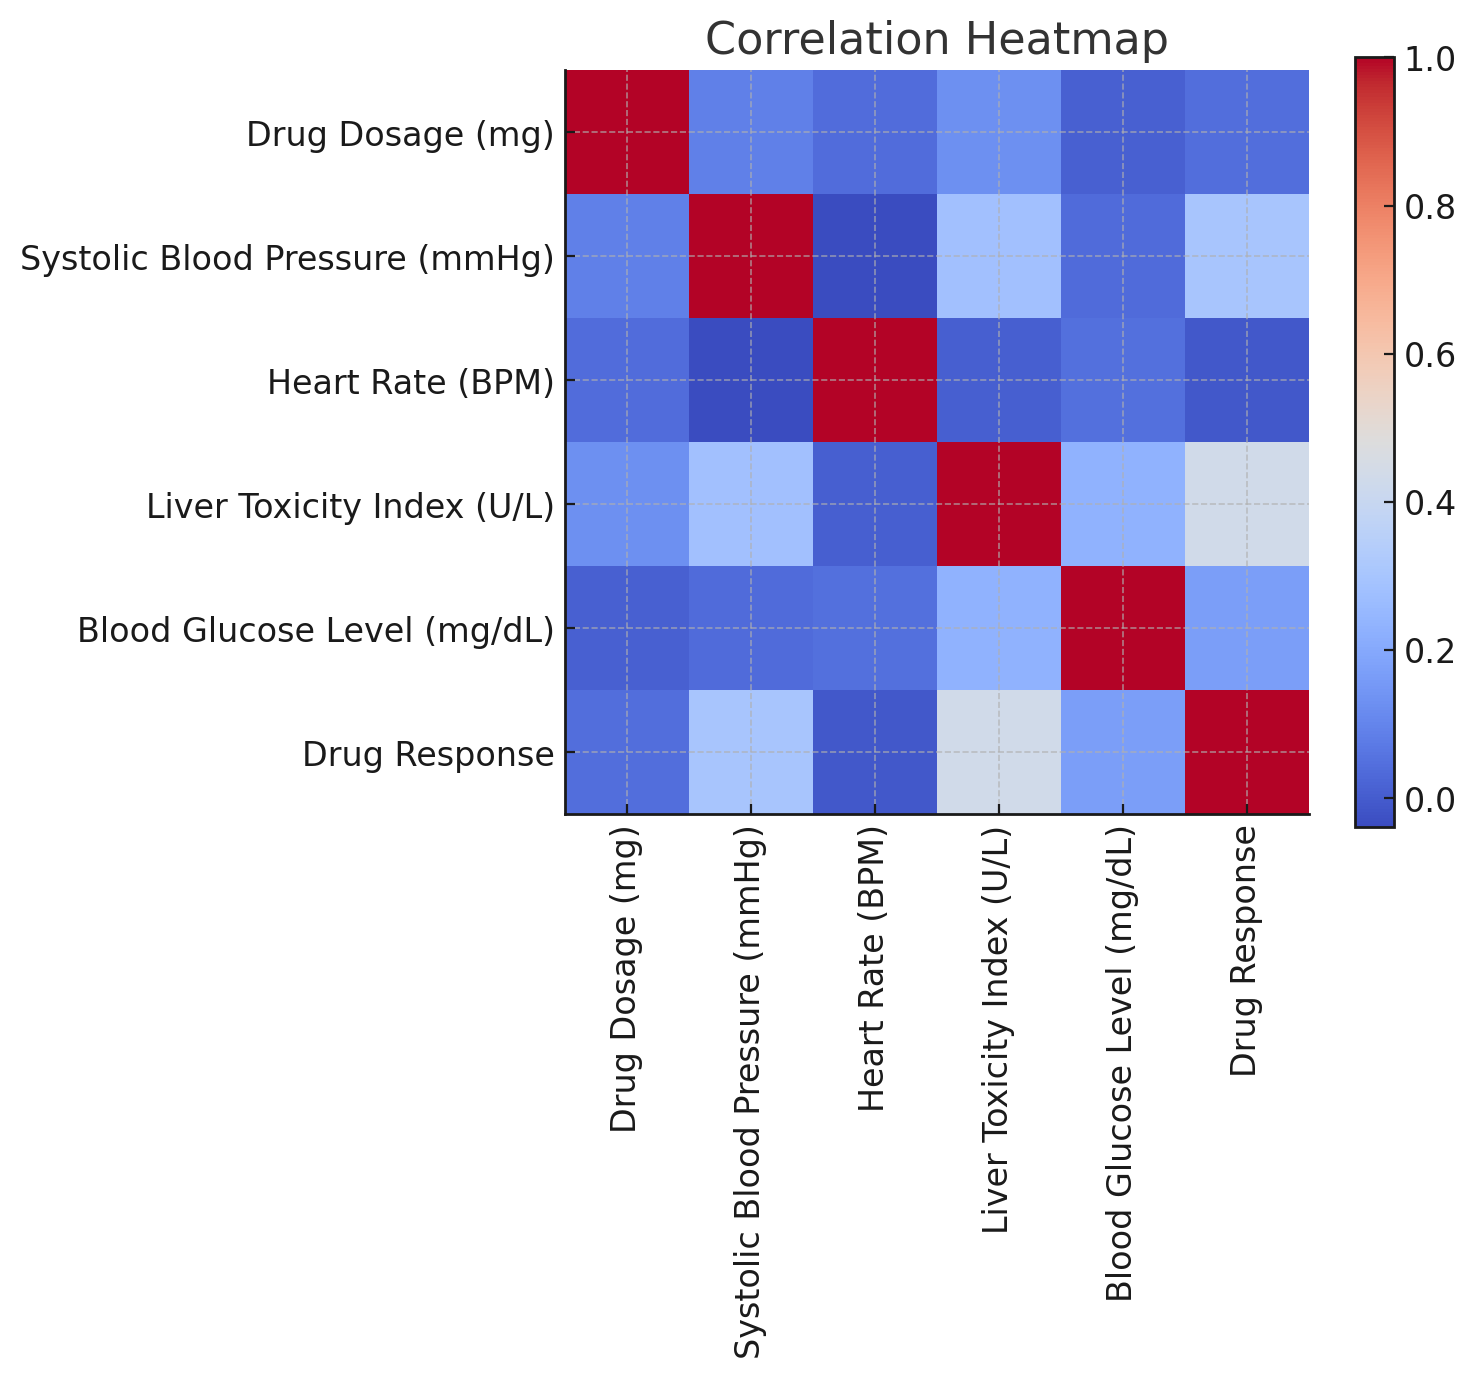

In [5]:
corr=df.corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Task 2 — Data Preprocessing

In [6]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['Drug Response'])
y=df['Drug Response']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape

((400, 5), (100, 5))

## Task 3 — Visualization

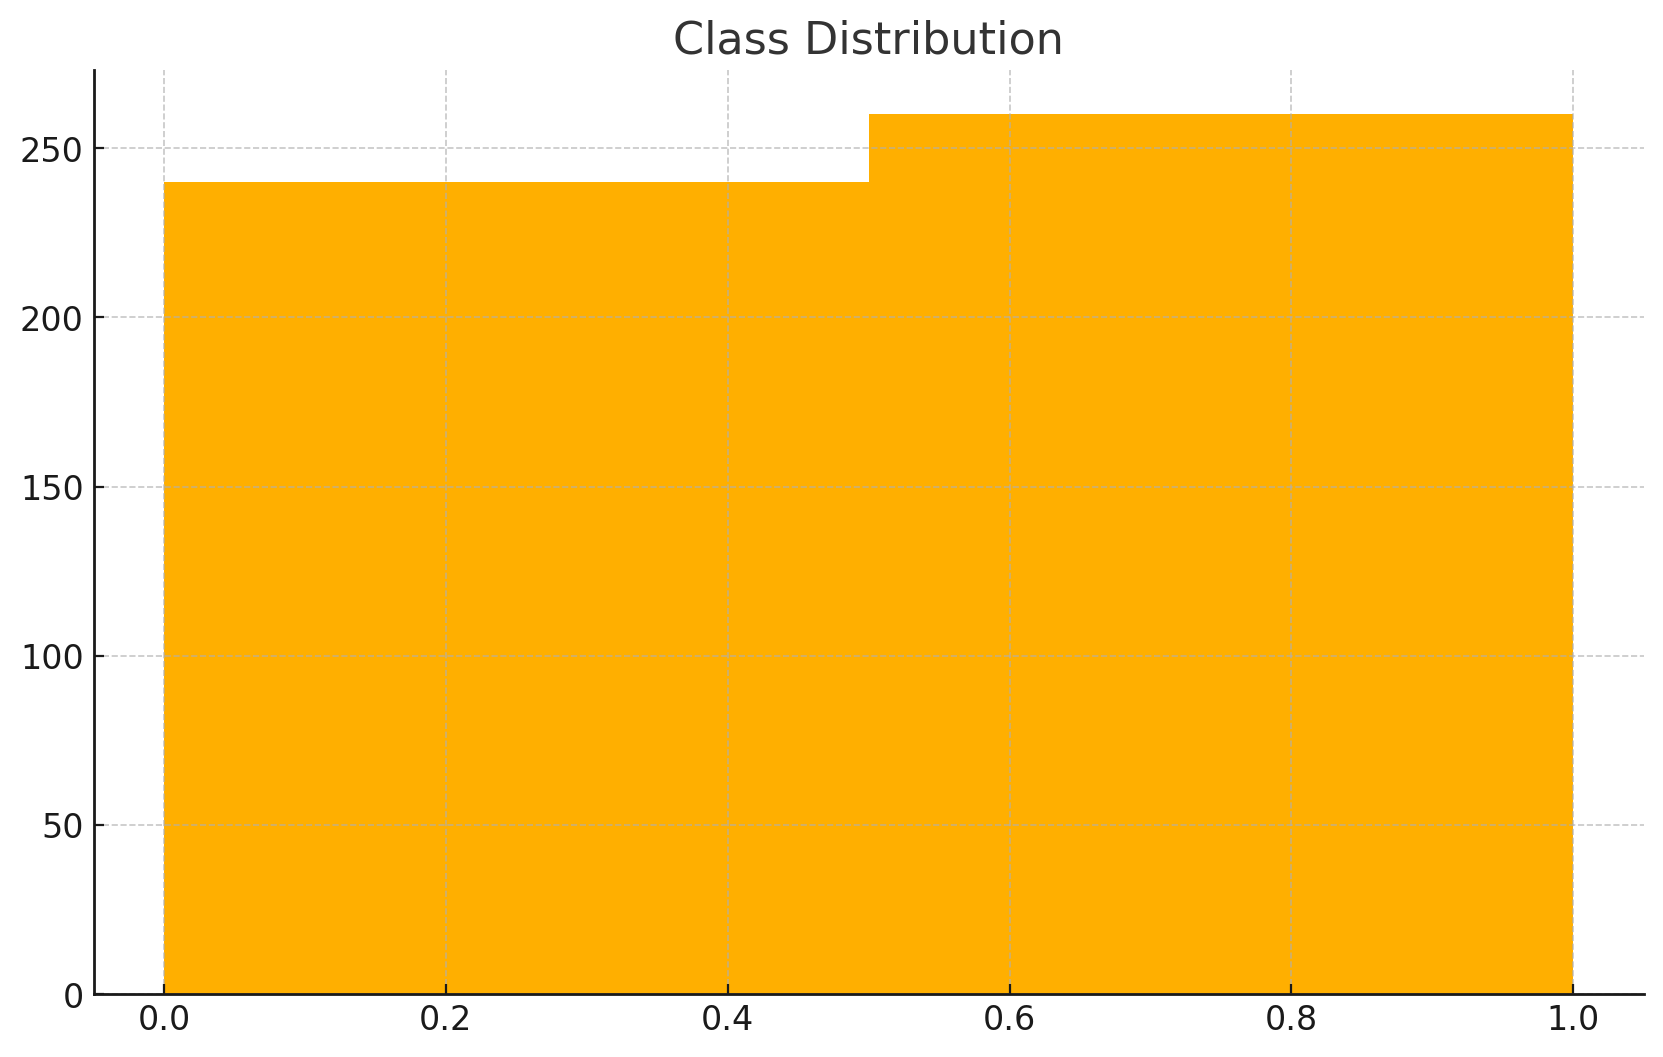

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(y, bins=2)
plt.title("Class Distribution")
plt.show()

## Task 4 — SVM Implementation

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

acc = accuracy_score(y_test,pred)
prec = precision_score(y_test,pred)
rec = recall_score(y_test,pred)
f1 = f1_score(y_test,pred)

(acc,prec,rec,f1)

(0.72, 0.7608695652173914, 0.6730769230769231, 0.7142857142857143)

In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



## Task 5 — Visualization of SVM Results

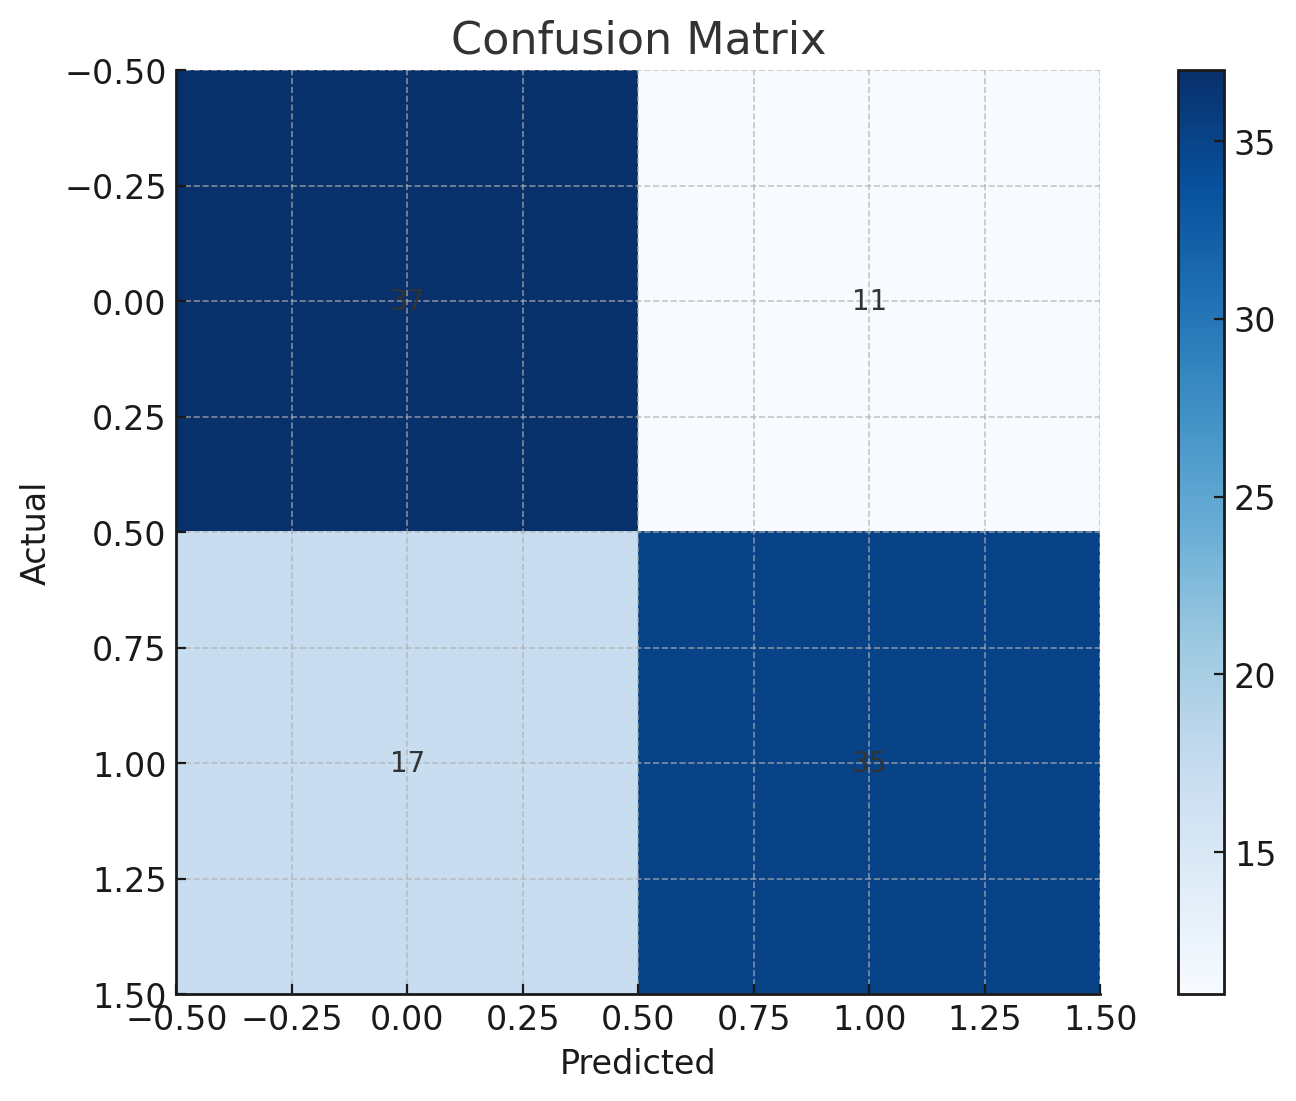

In [10]:
cm = confusion_matrix(y_test,pred)
plt.imshow(cm,cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j,i,cm[i,j],ha='center',va='center')
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

## Task 6 — Parameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid={'svm__kernel':['linear','rbf','poly'],
            'svm__C':[0.1,1,10],
            'svm__gamma':['scale','auto']}

grid=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

grid.best_params_, grid.best_score_

({'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'},
 0.7525000000000001)

## Task 7 — Kernel Comparison

In [12]:
results={}
for k in ['linear','rbf','poly']:
    model = Pipeline([('scaler',StandardScaler()),
                      ('svm',SVC(kernel=k))])
    model.fit(X_train,y_train)
    p=model.predict(X_test)
    results[k]=accuracy_score(y_test,p)

results

{'linear': 0.72, 'rbf': 0.77, 'poly': 0.65}